# Module 1 - Manipulating data with Pandas
## Pandas Part 2

![austin](http://www.austintexas.gov/sites/default/files/aac_logo.jpg)

## Scenario:
You have decided that you want to start your own animal shelter, but you want to get an idea of what that will entail and get more information about planning. In this lecture, we are continue to look at a real data set collected by Austin Animal Center over several years and use our pandas skills from the last lecture and learn some new ones in order to explore this data further.

#### _Our goals today are to be able to_: <br/>

Use the pandas library to:

- Get summary info about a dataset and its variables
  - Apply and use info, describe and dtypes
  - Use mean, min, max, and value_counts 
- Use apply and applymap to transform columns and create new values

- Explain lambda functions and use them to use an apply on a DataFrame
- Explain what a groupby object is and split a DataFrame using a groupby
- Reshape a DataFrame using joins, merges, pivoting, stacking, and melting


## Getting started

Let's take a moment to examine the [Austin Animal Center data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). What kinds of questions can we ask this data and what kinds of information can we get back?

In pairs and as a class, let's generate ideas.

## Switch gears

Before we answer those questions about the animal shelter data, let's practice on a simpler dataset.
Read about this dataset here: https://www.kaggle.com/ronitf/heart-disease-uci
![heart-data](images/heartbloodpres.jpeg)

The dataset is most often used to practice classification algorithms. Can one develop a model to predict the likelihood of heart disease based on other measurable characteristics? We will return to that specific question in a few weeks, but for now we wish to use the dataset to practice some pandas methods.

### 1. Get summary info about a dataset and its variables

Applying and using `info`, `describe`, `mean`, `min`, `max`, `apply`, and `applymap` from the Pandas library

The Pandas library has several useful tools built in. Let's explore some of them.

In [1]:
!pwd
!ls -al

/c/Users/power/OneDrive/desktop/dc-ds-071519/1-Module/week-2/day-6-pandas-part-2
total 29
drwxr-xr-x 1 power 197609     0 Jul 22 09:38 .
drwxr-xr-x 1 power 197609     0 Jul 22 09:36 ..
drwxr-xr-x 1 power 197609     0 Jul 22 09:38 .ipynb_checkpoints
-rw-r--r-- 1 power 197609 18136 Jul 22 09:36 manipulating_data_with_pandas.ipynb
-rw-r--r-- 1 power 197609  3356 Jul 22 09:36 pre_process_animal_shelter_data.py
-rw-r--r-- 1 power 197609   136 Jul 22 09:36 states.csv


In [3]:
import pandas as pd
uci = pd.read_csv('heart.csv')

In [4]:
uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### The `.columns` and `.shape` Attributes

In [5]:
uci.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
uci.shape

(303, 14)

In [8]:
uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


#### The `.info() `and `.describe()` and `.dtypes` methods

Pandas DataFrames have many useful methods! Let's look at `.info()` , `.describe()`, and `dtypes`.

In [9]:
# Call the .info() method on our dataset. What do you observe?

uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [14]:
# Call the .describe() method on our dataset. What do you observe?

uci.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
uci.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
# Use the code below. How does the output differ from info() ?
uci.dtypes

#### `.mean()`, .`min()`,` .max()`, `.sum()`

The methods `.mean()`, `.min()`, and `.max()` will perform just the way you think they will!

Note that these are methods both for Series and for DataFrames.

In [10]:
uci.ca.mean()

0.7293729372937293

#### The Axis Variable

In [11]:
uci.sum() # Try [shift] + [tab] here!

age         16473.0
sex           207.0
cp            293.0
trestbps    39882.0
chol        74618.0
fbs            45.0
restecg       160.0
thalach     45343.0
exang          99.0
oldpeak       315.0
slope         424.0
ca            221.0
thal          701.0
target        165.0
dtype: float64

#### .`value_counts()`

For a DataFrame _Series_, the `.value_counts()` method will tell you how many of each value you've got.

In [17]:
uci['age'].value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

Exercise: What are the different values for restecg?

In [22]:
import matplotlib.pyplot as plt

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

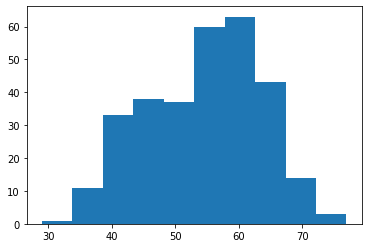

In [23]:
# Your code here!
plt.hist(uci['age'])

### Apply to Animal Shelter Data
Using `.info()` and `.describe()` and `dtypes` what observations can we make about the data?

What are the breed value counts?

How about age counts for dogs?

In [24]:
animal_outcomes = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')

In [25]:
animal_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104442 entries, 0 to 104441
Data columns (total 12 columns):
Animal ID           104442 non-null object
Name                71690 non-null object
DateTime            104442 non-null object
MonthYear           104442 non-null object
Date of Birth       104442 non-null object
Outcome Type        104435 non-null object
Outcome Subtype     47571 non-null object
Animal Type         104442 non-null object
Sex upon Outcome    104440 non-null object
Age upon Outcome    104427 non-null object
Breed               104442 non-null object
Color               104442 non-null object
dtypes: object(12)
memory usage: 9.6+ MB


In [28]:
animal_outcomes.Breed.value_counts()[:10]

Domestic Shorthair Mix       29921
Pit Bull Mix                  7934
Labrador Retriever Mix        6181
Chihuahua Shorthair Mix       5984
Domestic Medium Hair Mix      3018
German Shepherd Mix           2685
Bat Mix                       1741
Domestic Shorthair            1688
Domestic Longhair Mix         1487
Australian Cattle Dog Mix     1345
Name: Breed, dtype: int64

What are the breed `value_counts`?
What's the top breed for adopted dogs?

How about outcome counts for dogs?




In [31]:
animal_outcomes[(animal_outcomes['Animal Type']=='Dog') \
                & (animal_outcomes['Outcome Type']=='Adoption')\
               ].Breed.value_counts()[:10]

Labrador Retriever Mix       3117
Pit Bull Mix                 3075
Chihuahua Shorthair Mix      2864
German Shepherd Mix          1356
Australian Cattle Dog Mix     752
Dachshund Mix                 477
Border Collie Mix             459
Boxer Mix                     405
Catahoula Mix                 330
Staffordshire Mix             329
Name: Breed, dtype: int64

### 2.  Changing data

#### DataFrame.applymap() and Series.map()

The ```.applymap()``` method takes a function as input that it will then apply to every entry in the dataframe.

In [32]:
def successor(x):
    return x + 1

In [33]:
uci.applymap(successor).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,64,2,4,146,234,2,1,151,1,3.3,1,1,2,2
1,38,2,3,131,251,1,2,188,1,4.5,1,1,3,2
2,42,1,2,131,205,1,1,173,1,2.4,3,1,3,2
3,57,2,2,121,237,1,2,179,1,1.8,3,1,3,2
4,58,1,1,121,355,1,2,164,2,1.6,3,1,3,2


The `.map()` method takes a function as input that it will then apply to every entry in the Series.

In [37]:
uci['age'].apply(successor).tail(10)==uci['age'].map(successor).tail(10)

293    True
294    True
295    True
296    True
297    True
298    True
299    True
300    True
301    True
302    True
Name: age, dtype: bool

#### Anonymous Functions (Lambda Abstraction)

Simple functions can be defined right in the function call. This is called 'lambda abstraction'; the function thus defined has no name and hence is "anonymous".

In [38]:
uci['oldpeak'].map(lambda x: round(x))[:4]

0    2
1    4
2    1
3    1
Name: oldpeak, dtype: int64

Exercise: Use an anonymous function to turn the entries in age to strings

In [39]:
uci['age'].map(lambda x: str(x))

0      63
1      37
2      41
3      56
4      57
5      57
6      56
7      44
8      52
9      57
10     54
11     48
12     49
13     64
14     58
15     50
16     58
17     66
18     43
19     69
20     59
21     44
22     42
23     61
24     40
25     71
26     59
27     51
28     65
29     53
       ..
273    58
274    47
275    52
276    58
277    57
278    58
279    61
280    42
281    52
282    59
283    40
284    61
285    46
286    59
287    57
288    57
289    55
290    61
291    58
292    58
293    67
294    44
295    63
296    63
297    59
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: object

### Apply to Animal Shelter Data

Use an `apply` to change the dates from strings to datetime objects. Similarly, use an apply to change the ages of the animals from strings to floats.

In [41]:
animal_outcomes['datetime']=pd.to_datetime(animal_outcomes['DateTime'])# Your code here

In [42]:
animal_outcomes['dob']=pd.to_datetime(animal_outcomes['Date of Birth'])

In [64]:
animal_outcomes['dob'].dt.to_period("M")

0         2019-05
1         2013-07
2         2019-06
3         2019-04
4         2019-04
5         2014-07
6         2019-04
7         2019-04
8         2016-07
9         2014-09
10        2017-07
11        2018-07
12        2019-03
13        2019-05
14        2018-07
15        2019-05
16        2019-04
17        2018-11
18        2019-05
19        2019-05
20        2019-05
21        2018-06
22        2019-04
23        2017-04
24        2019-01
25        2019-05
26        2017-07
27        2019-05
28        2015-07
29        2019-01
           ...   
104412    2010-09
104413    1999-09
104414    2011-09
104415    1999-09
104416    2012-12
104417    2003-09
104418    2013-09
104419    2013-09
104420    2013-09
104421    2013-09
104422    2013-09
104423    2013-05
104424    2013-08
104425    2010-05
104426    2012-03
104427    2006-10
104428    2011-09
104429    2010-09
104430    2012-09
104431    2013-04
104432    2013-03
104433    2004-09
104434    2010-09
104435    2011-09
104436    

In [85]:
animal_outcomes['age']=(animal_outcomes['dob']- animal_outcomes['datetime']).dt.days

## 3. Methods for Re-Organizing DataFrames
#### `.groupby()`

Those of you familiar with SQL have probably used the GROUP BY command. Pandas has this, too.

The `.groupby()` method is especially useful for aggregate functions applied to the data grouped in particular ways.

In [70]:
uci.groupby('sex')

#### `.groups` and `.get_group()`

In [82]:
uci.groupby('sex').groups

{0: Int64Index([  2,   4,   6,  11,  14,  15,  16,  17,  19,  25,  28,  30,  35,
              36,  38,  39,  40,  43,  48,  49,  50,  53,  54,  59,  60,  65,
              67,  69,  74,  75,  82,  84,  85,  88,  89,  93,  94,  96, 102,
             105, 107, 108, 109, 110, 112, 115, 118, 119, 120, 122, 123, 124,
             125, 127, 128, 129, 130, 131, 134, 135, 136, 140, 142, 143, 144,
             146, 147, 151, 153, 154, 155, 161, 167, 181, 182, 190, 204, 207,
             213, 215, 216, 220, 223, 241, 246, 252, 258, 260, 263, 266, 278,
             289, 292, 296, 298, 302],
            dtype='int64'),
 1: Int64Index([  0,   1,   3,   5,   7,   8,   9,  10,  12,  13,
             ...
             288, 290, 291, 293, 294, 295, 297, 299, 300, 301],
            dtype='int64', length=207)}

In [72]:
uci.groupby('sex').get_group(0) # .tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1


### Aggregating

In [73]:
uci.groupby('sex').std()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,9.409396,0.972427,19.311119,65.088946,0.332455,0.557150,20.047969,0.422503,1.119844,0.593736,0.881026,0.441290,0.435286
1,8.883803,1.059064,16.658246,42.782392,0.366955,0.510754,24.130882,0.484505,1.174632,0.627378,1.074082,0.659949,0.498626


Exercise: Tell me the average cholesterol level for those with heart disease.

In [ ]:
# Your code here!


### Apply to Animal Shelter Data

#### Task 1
- Use a groupby to show the average age of the different kinds of animal types.
- What about by animal types **and** gender?
 

In [83]:
animal_outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,datetime,dob
0,A800130,Kolby,07/21/2019 10:56:00 PM,07/21/2019 10:56:00 PM,05/01/2019,Adoption,NaN,Dog,Spayed Female,2 months,Boxer,Brown,2019-07-21 22:56:00,2019-05-01
1,A799457,Hazel,07/21/2019 10:55:00 PM,07/21/2019 10:55:00 PM,07/08/2013,NaN,NaN,Dog,Spayed Female,6 years,Pit Bull,Tan/White,2019-07-21 22:55:00,2013-07-08
2,A800069,NaN,07/21/2019 07:57:00 PM,07/21/2019 07:57:00 PM,06/02/2019,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair,Orange Tabby,2019-07-21 19:57:00,2019-06-02
3,A795483,*Herb,07/21/2019 07:15:00 PM,07/21/2019 07:15:00 PM,04/21/2019,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair,Orange Tabby/White,2019-07-21 19:15:00,2019-04-21
4,A795482,*Rain,07/21/2019 07:13:00 PM,07/21/2019 07:13:00 PM,04/21/2019,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair,Orange Tabby/White,2019-07-21 19:13:00,2019-04-21


In [86]:
animal_outcomes.groupby('Animal Type')['age'].mean()

Animal Type
Bird         -512.776151
Cat          -540.708424
Dog         -1024.842313
Livestock    -420.500000
Other        -464.706672
Name: age, dtype: float64

#### Task 2:
- Create new columns `year` and `month` by using a lambda function x.year on date
- Use `groupby` and `.size()` to tell me how many animals are adopted by month

In [89]:
# Your code here
animal_outcomes['year']=animal_outcomes['datetime'].dt.year
animal_outcomes['month']=animal_outcomes['datetime'].dt.month
animal_outcomes[animal_outcomes['Outcome Type']=='Adoption'].groupby(['year','month']).size()


year  month
2013  10        606
      11        552
      12        684
2014  1         518
      2         437
      3         483
      4         439
      5         507
      6         660
      7         907
      8         816
      9         607
      10        582
      11        519
      12        652
2015  1         540
      2         484
      3         472
      4         402
      5         629
      6         706
      7         896
      8         721
      9         630
      10        583
      11        658
      12        656
2016  1         599
      2         539
      3         540
               ... 
2017  2         647
      3         440
      4         510
      5         702
      6         746
      7         867
      8         851
      9         686
      10        709
      11        575
      12        649
2018  1         572
      2         508
      3         592
      4         471
      5         620
      6         790
      7         808
      8 

## 4. Reshaping a DataFrame

### `.pivot()`

Those of you familiar with Excel have probably used Pivot Tables. Pandas has a similar functionality.

In [ ]:
uci.pivot(values = 'sex', columns = 'target').head()

### Methods for Combining DataFrames: `.join()`, `.merge()`, `.concat()`, `.melt()`

### `.join()`

In [ ]:
toy1 = pd.DataFrame([[63, 142], [33, 47]], columns = ['age', 'HP'])
toy2 = pd.DataFrame([[63, 100], [33, 200]], columns = ['age', 'HP'])

In [ ]:
toy1.join(toy2.set_index('age'),
          on = 'age',
          lsuffix = '_A',
          rsuffix = '_B').head()

### `.merge()`

In [ ]:
ds_chars = pd.read_csv('ds_chars.csv', index_col = 0)

In [ ]:
states = pd.read_csv('states.csv', index_col = 0)

In [ ]:
ds_chars.merge(states,
               left_on='home_state',
               right_on = 'state',
               how = 'inner')

### `pd.concat()`

Exercise: Look up the documentation on pd.concat (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) and use it to concatenate ds_chars and states.
<br/>
Your result should still have only five rows!

In [ ]:
pd.concat([ds_chars, states])

### `pd.melt()`

Melting removes the structure from your DataFrame and puts the data in a 'variable' and 'value' format.

In [ ]:
ds_chars.head()

In [ ]:
pd.melt(ds_chars,
        id_vars=['name'],
        value_vars=['HP', 'home_state'])

## Bringing it all together with the Animal Shelter Data

Join the data from the [Austin Animal Shelter Intake dataset](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) to the outcomes dataset by Animal ID.

Use the dates from each dataset to see how long animals spend in the shelter. Does it differ by time of year? By outcome?

The Url for the Intake Dataset is here: https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD

_Hints_ :
- import and clean the intake dataset first
- use apply/applymap/lambda to change the variables to their proper format in the intake data
- rename the columns in the intake dataset *before* joining
- create a new days-in-shelter variable
- Notice that some values in "days_in_shelter" column are NaN or values < 0 (remove these rows using the "<" operator and ~is.na())
- Use group_by to get some interesting information about the dataset

Make sure to export and save your cleaned dataset. We will use it in a later lecture!

use the notation `df.to_csv()` to write the `df` to a csv. Read more about the `to_csv()` documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [ ]:
#code here